# ID Card Tamering Detection Project

#### The purpose of this project is to detect tampering of ID card using computer vision. This project will help different organization in detecting whether the ID card provided to them by thier employees or customers or anyone is original or not.

#### For this project we will calculate structural similarity of original ID card and the ID card uploaded by user.

In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests


#### Loading real and user provided ID cards.

In [2]:
real_idcard = Image.open('images\\real_idcard.jpg')
user_idcard = Image.open('images\\fake_idcard.jpg')

In [3]:
# The file format of the souce file.
print(f'Real IDcard format is {real_idcard.format}')
print(f'user provided IDcard format is {user_idcard.format}')

Real IDcard format is JPEG
user provided IDcard format is JPEG


In [4]:
# Image size, in pixels.
print(f'Real IDcard size is {real_idcard.size}')
print(f'user provided IDcard size is {user_idcard.size}')

Real IDcard size is (800, 479)
user provided IDcard size is (274, 184)


#### Converting the format of  user provided image similar to real image.

In [5]:
# Resize and save real ID card
real_idcard = real_idcard.resize((250, 160))
print(real_idcard.size)
real_idcard.save('images//real_idcard_resized.jpg')

(250, 160)


In [6]:
# Resize and save user provided ID card
user_idcard = user_idcard.resize((250, 160))
print(user_idcard.size)
user_idcard.save('images//user_idcard_resized.jpg')

(250, 160)


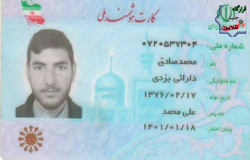

In [7]:
real_idcard

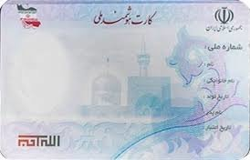

In [8]:
user_idcard

#### User provided image which will be compared with ID card.

In [9]:
# load the two input images
real_idcard = cv2.imread('images//real_idcard_resized.jpg')
user_idcard = cv2.imread('images//user_idcard_resized.jpg')

In [10]:
# Convert the images to grayscale
real_idcard_gray = cv2.cvtColor(real_idcard, cv2.COLOR_BGR2GRAY)
user_idcard_gray = cv2.cvtColor(user_idcard, cv2.COLOR_BGR2GRAY)

In [11]:
# Compute the Structural Similarity Index between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(real_idcard_gray, user_idcard_gray, full=True)
diff = (diff * 255).astype('uint8')
print(f'Similarity index is {score}')

Similarity index is 0.4109421280740222


In [12]:
# Calculating threshold and contours 
threshold = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [13]:
# loop over the contours
for c in cnts:
    #apply counters on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(real_idcard, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.rectangle(user_idcard, (x,y), (x+w, y+h), (0,0,255), 2)

Real Format Image


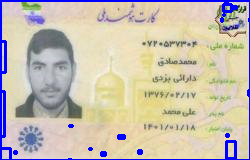

In [14]:
#Diplay original image with contour
print('Real Format Image')
Image.fromarray(real_idcard)

User Image


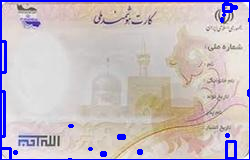

In [15]:
#Diplay user image with contour
print('User Image')
Image.fromarray(user_idcard)

Different Image


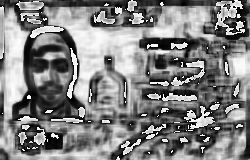

In [16]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


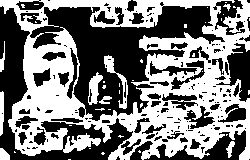

In [17]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(threshold)